### Importing Required Libraries

In this section, we import the necessary libraries:

- **pandas** and **numpy** for data manipulation.
- **xgboost** for the classification model.
- **sklearn.model_selection** for splitting the dataset and performing hyperparameter tuning via grid search.
- **sklearn.metrics** for evaluating the model's performance using metrics like balanced accuracy, ROC AUC, and confusion matrix.

These libraries provide essential functionality for preprocessing the data, tuning the model, and evaluating its performance.


In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer,confusion_matrix,ConfusionMatrixDisplay



### Step 1: Load the Dataset
In this step, we load the dataset into a Pandas DataFrame from a CSV file and display the first few rows to understand its structure.


In [12]:
df=pd.read_csv("dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Step 2: Drop the `customerID` Column
In this step, we remove the `customerID` column from the dataset, as it is likely not relevant for prediction. This ensures that the model does not treat it as a feature.


In [18]:
df.drop('customerID',axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Step 3: Check Data Types of Each Column
In this step, we inspect the data types of each column in the DataFrame to ensure that the columns are correctly formatted for modeling.


In [21]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


### Step 4: Check for Empty or Missing Values in `TotalCharges` Column
In this step, we check if there are any rows in the `TotalCharges` column that contain empty values or spaces, which may need to be handled before training the model.


In [28]:
len(df.loc[df['TotalCharges']==' '])

11

### Step 5: Handle Empty Values and Convert `TotalCharges` to Numeric
In this step, we replace empty values in the `TotalCharges` column with `0` and then convert the column to a numeric data type, which is necessary for model training.

In [ ]:
df.loc[(df['TotalCharges']==' '),'TotalCharges']=0
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [33]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [34]:
df.replace(' ','_' ,regex=True, inplace=True)

### Step 6: Separate Features (X) and Target (y)
In this step, we separate the features (X) and the target variable (y). The features are all columns except for the target column `Churn`, which we store separately in `y`.


In [36]:
X=df.drop('Churn',axis=1).copy()
y=df['Churn'].copy()

### Step 7: Apply One-Hot Encoding to Categorical Features
In this step, we apply one-hot encoding to the categorical columns in the feature set `X` to convert them into a format that can be used by machine learning models.


In [ ]:
X_encoded=pd.get_dummies(X,columns=['PaymentMethod','gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling'])
X_encoded.head()

In [45]:
y.replace(('Yes','No'),(1,0),inplace=True)

C:\Users\dbrah\AppData\Local\Temp\ipykernel_23920\875928291.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(('Yes','No'),(1,0),inplace=True)


### Step 8: Split the Data into Training and Testing Sets
In this step, we split the dataset into training and testing sets. This allows us to train the model on one portion of the data and evaluate its performance on a separate portion to assess its generalization ability.


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42,stratify=y)

### Step 9: Initialize and Train the XGBoost Classifier
In this step, we initialize the XGBoost classifier and train it on the training data. We also evaluate the model on the test set during training to monitor its performance.


In [ ]:
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',seed=42,eval_metric='aucpr')
clf_xgb.fit(
    X_train,y_train,verbose=True,eval_set=[(X_test,y_test)]
)

[0]	validation_0-aucpr:0.64097
[1]	validation_0-aucpr:0.63939
[2]	validation_0-aucpr:0.63733
[3]	validation_0-aucpr:0.63760
[4]	validation_0-aucpr:0.64161
[5]	validation_0-aucpr:0.63695
[6]	validation_0-aucpr:0.63588
[7]	validation_0-aucpr:0.63674
[8]	validation_0-aucpr:0.63375
[9]	validation_0-aucpr:0.63513
[10]	validation_0-aucpr:0.63511
[11]	validation_0-aucpr:0.63528
[12]	validation_0-aucpr:0.63356
[13]	validation_0-aucpr:0.63530
[14]	validation_0-aucpr:0.63478
[15]	validation_0-aucpr:0.63548
[16]	validation_0-aucpr:0.63581
[17]	validation_0-aucpr:0.63459
[18]	validation_0-aucpr:0.63271
[19]	validation_0-aucpr:0.63213
[20]	validation_0-aucpr:0.63195
[21]	validation_0-aucpr:0.63164
[22]	validation_0-aucpr:0.63012
[23]	validation_0-aucpr:0.63075
[24]	validation_0-aucpr:0.63055
[25]	validation_0-aucpr:0.63090
[26]	validation_0-aucpr:0.63102
[27]	validation_0-aucpr:0.62971
[28]	validation_0-aucpr:0.62969
[29]	validation_0-aucpr:0.62950
[30]	validation_0-aucpr:0.62771
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Step 10: Make Predictions and Plot the Confusion Matrix
In this step, we use the trained XGBoost model to make predictions on the test data, and then plot the confusion matrix to evaluate the model’s performance.
Accuracy Consideration
Accuracy: While accuracy is an important metric, it can be misleading in cases where the dataset is imbalanced. In this case, there is a significant imbalance between the positive and negative classes (i.e., the churn class is much smaller). As a result, even if the model predicts the negative class correctly most of the time, the accuracy may be high, but the model may be failing to correctly predict the minority class (positive churn).

Important: In such cases, alternative metrics like Precision, Recall, and F1-score, or metrics like Precision-Recall AUC (AUC-PR), should be considered to assess model performance on the minority class, as they provide a more accurate measure of the model’s effectiveness for predicting the positive class.


In [ ]:
predictions = clf_xgb.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


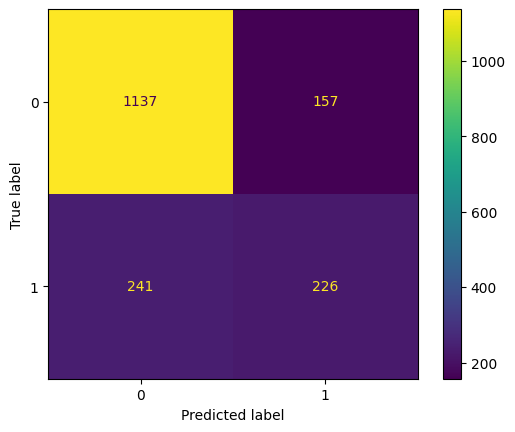

In [ ]:
disp.plot()

### Step 11: Hyperparameter Tuning with GridSearchCV for Recall
In this step, we perform hyperparameter tuning using `GridSearchCV` to find the best set of hyperparameters for our XGBoost classifier. We prioritize recall as the scoring metric, which is particularly important when dealing with imbalanced datasets, as it focuses on minimizing false negatives (i.e., correctly identifying positive churn cases).


In [129]:
param_grid={
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0],
    'scale_pos_weight':[1,3,5]
}
optimal_params=GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=42,subsample=0.9,colsample_bytree=0.5),
                            param_grid=param_grid,scoring='recall',verbose=0,
                            n_jobs=10,cv=3)

### Step 12: Fitting the Model and Retrieving Best Parameters

After defining the `GridSearchCV` with the hyperparameter grid and selecting the recall scoring metric, we proceed by fitting the model on the training data. The `fit()` function runs the grid search over the defined parameter grid and identifies the best hyperparameters based on the recall score.


In [130]:
optimal_params.fit(X_train, y_train)

# Retrieve best parameters
print("Best Parameters:", optimal_params.best_params_)

Best Parameters: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'reg_lambda': 0, 'scale_pos_weight': 5}


### Step 13: Refined Grid Search for Hyperparameter Tuning

In this step, we perform a refined grid search to fine-tune the model's hyperparameters based on the recall score. The goal is to further improve the model's ability to detect churn (minimizing false negatives) by experimenting with different values of `scale_pos_weight`, which can have a significant impact in cases of imbalanced datasets.


In [131]:
refined_param_grid = {
    'max_depth': [3],
    'learning_rate': [0.01],
    'gamma': [0],
    'reg_lambda': [0],
    'scale_pos_weight': [5,7,9]
}

refined_search=GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=42,subsample=0.9,colsample_bytree=0.5),
                            param_grid=refined_param_grid,scoring='recall',verbose=0,
                            n_jobs=10,cv=3)
refined_search.fit(X_train, y_train)
print("Refined Best Parameters:", refined_search.best_params_)


Refined Best Parameters: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'reg_lambda': 0, 'scale_pos_weight': 9}


In [138]:
final_model = xgb.XGBClassifier(
    objective='binary:logistic',
    seed=42,
    subsample=0.9,
    colsample_bytree=0.5,
    eval_metric='aucpr'  ,
    early_stopping_rounds=50,
    gamma=0,
    learning_rate=0.01,
    max_depth=3,
    reg_lambda=0,
    scale_pos_weight=9


)

final_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# Predictions and Evaluation
y_pred = final_model.predict(X_test)


[0]	validation_0-aucpr:0.56547
[1]	validation_0-aucpr:0.57243
[2]	validation_0-aucpr:0.58437
[3]	validation_0-aucpr:0.62007
[4]	validation_0-aucpr:0.61648
[5]	validation_0-aucpr:0.61868
[6]	validation_0-aucpr:0.61494
[7]	validation_0-aucpr:0.60959
[8]	validation_0-aucpr:0.61300
[9]	validation_0-aucpr:0.61267
[10]	validation_0-aucpr:0.61671
[11]	validation_0-aucpr:0.62150
[12]	validation_0-aucpr:0.62082
[13]	validation_0-aucpr:0.61792
[14]	validation_0-aucpr:0.61842
[15]	validation_0-aucpr:0.62195
[16]	validation_0-aucpr:0.61872
[17]	validation_0-aucpr:0.61947
[18]	validation_0-aucpr:0.62531
[19]	validation_0-aucpr:0.62718
[20]	validation_0-aucpr:0.62646
[21]	validation_0-aucpr:0.62597
[22]	validation_0-aucpr:0.62563
[23]	validation_0-aucpr:0.62500
[24]	validation_0-aucpr:0.62562
[25]	validation_0-aucpr:0.62557
[26]	validation_0-aucpr:0.62688
[27]	validation_0-aucpr:0.62667
[28]	validation_0-aucpr:0.62695
[29]	validation_0-aucpr:0.62739
[30]	validation_0-aucpr:0.62758
[31]	validation_0-

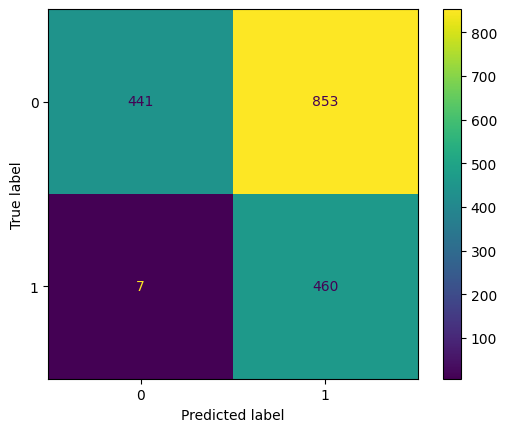

In [139]:
predictions = final_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [145]:
predictions = final_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities
threshold = 0.75  # Increase threshold to 0.7 for predicting "churn"
predictions = (predictions > threshold).astype(int)

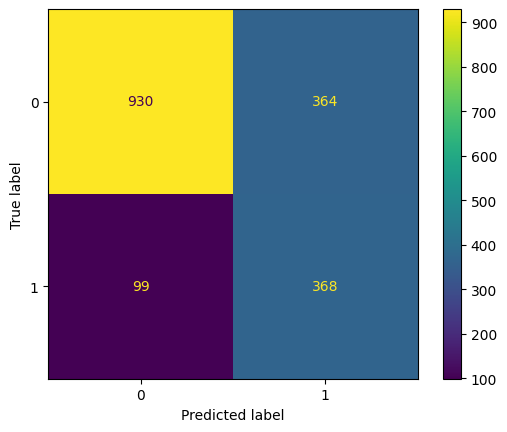

In [146]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()